In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [55]:
#lets write a network epidemic simulator and then include code to estimate the
#parameters rho, dist, (suppose d is known), and hence we can solve for $v$ 
#say there is a fixed amount of contact tracing that allows us to gather this
#information (highlights importance of this for estimation purposes)
class epidemic_node:
    def __init__(self):
        self.susceptible = True
        self.infected = False
        self.recovered = False
        self.connections = []
        self.test_positive_date = 0
        
    
    def infect(self):
        self.susceptible = False
        self.infected = True
    
    def recover(self):
        self.infected = False
        self.recovered = True
        
    def update_day(self):
        if self.test_positive_date >0:
            self.test
    

        
class individual_based_model:
    
    def __init__(self, num_nodes,rho,dist,d, lambda_desired = .95, delay = 0):
        
        self.rho = rho
        self.num_nodes = num_nodes
        self.d = d
        self.cure_rate = float(1)/d
        self.v = 0
        self.c = 0
        self.mu_x_est = 1
        self.rho_est = .5
        self.lambda_est = 1
        self.desired_lambda = lambda_desired
        self.max_testing = .5
        
        
        #create connections
        self.node_dict = {i:epidemic_node() for i in range(self.num_nodes)}
        
        for i in range(self.num_nodes):
            num_edges = np.random.choice(len(dist),p = dist)
            pot_edges = list(np.arange(self.num_nodes))
            pot_edges.remove(i)
            connecs = np.random.choice(pot_edges,num_edges,replace= False).tolist()
            self.node_dict[i].connections = connecs
         
    def set_testing(self,v):
        self.v = v
    
    def set_contact_tracing(self,c):
        self.c = c
        

        
    def simulate(self, num_infected_init,num_timesteps):
        
        #infect init population
        
        infected_init = np.random.choice(self.num_nodes,num_infected_init)
        
        for i in infected_init:
            self.node_dict[i].infect()
            
        num_tested_and_contact_traced = 0
        
        infections = []
        num_positive_tests = []
        num_estimated_infected = []
        growth_rates = []
        for i in range(num_timesteps):
            pos_tests = 0
            for j in range(self.num_nodes):
                if self.node_dict[j].infected:
                    for k in self.node_dict[j].connections:
                        if np.random.rand() < self.rho and self.node_dict[k].susceptible:
                            self.node_dict[k].infect()
                    
                    if np.random.rand() < self.v:
                        #positive test
                        pos_tests +=1
                        if np.random.rand() < self.c: #doing contact tracing a little diffferently. with prob c trace everyone.
                            for k in self.node_dict[j].connections:
                                if self.node_dict[k].infected:
                                    self.node_dict[k].recover()
                                
#                                 num_tested_and_contact_traced +=1
#                                 if num_tested_and_contact_traced ==1:
#                                     self.mu_x_est = len(self.node_dict[j].connections)
#                                 else:
#                                     self.mu_x_est*=(num_tested_and_contact_traced-1)
#                                     self.mu_x_est += len(self.node_dict[j].connections)
#                                     self.mu_x_est /= num_tested_and_contact_traced
                                
                                
                        self.node_dict[j].recover()
                    
                    
                        
                        
                    elif np.random.rand() < self.cure_rate:
                        self.node_dict[j].recover()
                        
            num_infected = 0
            for j in range(self.num_nodes):
                if self.node_dict[j].infected:
                    num_infected +=1
                    
            num_positive_tests.append(pos_tests)
            if self.v >0:
                num_estimated_infected.append(pos_tests/self.v)
            else:
                num_estimated_infected.append(0)
                
            if i > 0:
                if num_estimated_infected[i-1] !=0:
                    growth_rates.append(num_estimated_infected[i]/num_estimated_infected[i-1])
            
            window = 5
            
            
            
            #I think this could be done in a much more systematic way (perhaps taking lambda = p*lambda+new_est or something)
            
#             if len(growth_rates) >= 1:
#                 self.lambda_est = sum(growth_rates[-window:])/len(growth_rates[-window:])
            
#             apply_control = True
            
#             step_size = .03
            
#             if apply_control and num_estimated_infected[i]>0:
#                 delV = step_size*(self.lambda_est - self.desired_lambda)
                
#                 self.set_testing(self.v+delV)
                
#                 if self.v > self.max_testing:
#                     self.set_testing(self.max_testing)
#                 if self.v<0:
#                     self.set_testing=.01
                
#                 print(self.lambda_est,self.v)
            
            infections.append(num_infected)
            
        plt.figure()
        plt.plot(infections)
        plt.show()
        

            

1 0.1015
1.9704433497536944 0.13211330049261083
2.3297115887438817 0.17350464815492728
2.024508397064946 0.20573990006687565
1.7454290890763424 0.2296027727391659
1.7931737765217293 0.2548979860348178
1.5559922768673 0.2730777543408368
1.184138783004729 0.28010191783097865
1.1288003738638648 0.2854659290468946
1.1574213466797683 0.29168856944728766
0.9693730995379941 0.2922697624334275
0.9496925036401823 0.292260537542633
1.0655771090631432 0.2957278508145273
1.0612540595634363 0.2990654726014304
0.941403066670984 0.29880756460155994
1.2956063158387758 0.3091757540767232
1.282946349543489 0.3191641445630279
1.1547758537651542 0.3253074201759825
1.1278400049692805 0.3306426203250609
1.2427599621909435 0.3394254191907892
0.8258931314812926 0.335702213135228
0.9934194211129359 0.3370047957686161
1.054314955860003 0.34013424444441615
1.013788904716018 0.3420479115858967
0.9259813568732096 0.341327352292093
1.103621635088334 0.345936001344743
0.9148949768730914 0.34488285065093577
0.9374282

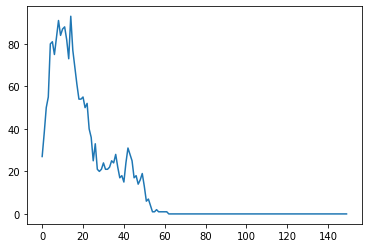

In [56]:
num_nodes=100
rho = .1
dist = np.ones(10)/10
d = 10

sim = individual_based_model(num_nodes,rho,dist,d)
# sim.set_testing(.1)
# sim.set_contact_tracing(1)
sim.set_testing(.1)
sim.simulate(20,150)

#okay so let's say we can effectively contact trace everyone first and then derive minimal necessary testing
#in order to stabilize the infection.

#it's funny though since getting information requires testing as well, so there's an interesting interplay.


#also one problem in estimating rho is that we don't know how long a person has been infected.
#maybe that's a question. what is the average amount if time someone's been infected when they're tested? should be 1/v
#what if this is greater than d though? shouldn't this be less likely? 
#so what's the expected value of the random variable that represents date of testing given recovery hasn't occured

#prob at time 1 should be something like (1-(1/d))*v, and prob at time k should be (1-v)^k (1-(1/d))^k v. This should be an
#geometric distribution? I guess we could empirically calculate this... I'm not sure there's a nice closed form expression
#for it

#I guess maybe the assumption should be that they've been infected

#in reality, people don't even know how long they've been infected though and who knows how long they've been infectious


#maybe we collect data through antibody testing??



#I suppose we could do something like we did before by taking I_t/I_{t-1} in order to estimate lambda. 
#testing also applies control however though so this might underestimate lambda, maybe it doesn't matter though?
#I'm not sure. That might be a good place to start though.

#but then what should we do? we could apply the same basic sort of 







#okay so at each time step if $v_i$ people are randomly tested (so in expectation num_nodes*v_i are tested)
#, y_i test positive, making the positivity rate around y_i/num_nodes*v_i
# meaning that in the whole population, we would expect to see something like (y_i/num_nodes*v_i)*num_nodes = y_i/v_i
#which i suppose is both interesting and in a way intuitive. This is something that can be calculated,
#and then used to estimate the growth rate lambda of the system.




#this doesn't really take advatage of the derivations we've done in the paper (which is one of the 
#proposed benefits of the paper, but at least it gives a sense of how it might work)

#maybe we could compare the two approaches (you're basically creating a PI controller in discrete time)






In [145]:
class probability_evolution:
    def __init__(self, num_nodes,rho,v,d,A):
        self.num_nodes = num_nodes
        self.rho = rho
        self.v = v
        self.d = d
        self.A = A
        self.state = np.ones(self.num_nodes)/(10*self.num_nodes)
        stateval = np.copy(self.state)
        self.trajectory = [stateval]
        self.linear_trajectory = [stateval]
    def state_evolution(self):
        oldstate = np.copy(self.state)
#         print(self.state)
        for i in range(self.num_nodes):
            
            infec_func = 0
            
            for j in range(self.num_nodes):
                val = oldstate[i]*self.A[i,j]*self.rho
                if j>0:
                    for k in range(j):
                        val*= (1-self.rho*self.A[i,k]*oldstate[k])
                
                infec_func += val
            
            
            self.state[i] = oldstate[i]*(1-self.v-(1/float(self.d))+self.v/self.d)+ (1-oldstate[i])*infec_func
        
        
        stateval = np.copy(self.state)
        self.trajectory.append(stateval)
            
    def simulate(self, num_timesteps):
        
        for i in range(num_timesteps):
            self.state_evolution()
#         print(self.trajectory)
    
#         plt.figure()
#         for i in range(10):
#             plt.plot(np.array(self.trajectory)[:,i])
#         plt.show()
        
    def simulate_linear_system(self, num_timesteps):
        
        self.linear_transition_matrix = np.eye(self.num_nodes)*(1-self.v-(1/float(self.d))+(self.v/self.d))
        off_diagonal = self.rho*self.A
        self.linear_transition_matrix += off_diagonal
        
        
        for i in range(num_timesteps):
            if i ==0:
                oldstate = np.copy(self.state)
            else:
                oldstate = np.copy(newstate)
            
            newstate = self.linear_transition_matrix.dot(oldstate)
            
            self.linear_trajectory.append(newstate)
            
    
#let's do some linear system analysis

#first of note that lambda is calculated as

#         λ= 1 +ρμx(1−cν)−ν−1/d+ν/d

#in our case =0 which makes things a little simpler. mu_x needs to be calculated

#I guess start with unstable rho and then increase v until system stabilizes. Plot lambda and p(Atilde)


            
    
        
        
        
        

            
            

In [180]:
import networkx as nx

from networkx.generators.random_graphs import powerlaw_cluster_graph, gnp_random_graph

gr = powerlaw_cluster_graph(500,2,.5)
# gr = gnp_random_graph(500,.1)

A = nx.to_numpy_matrix(gr)
# plt.figure(figsize = (15,15))
# nx.draw(gr)
# plt.show()
# print(A)


rho = .05

d = 5

lambdas = []
spec_radiuss = []


mu_x = np.sum(np.sum(A))/500
print(mu_x)

testing_values = np.linspace(0,1,100)

off_diagonal = rho*A

for v in testing_values:
    lambdas.append(1+rho*mu_x-v-(1/float(d))-(float(v)/d))
    
    mat = off_diagonal + (1-v-(float(1)/d)+(float(v)/d))*np.eye(500)
    
    eigs,_ = np.linalg.eig(mat)
    maxval = max(list(np.abs(eigs)))
    
    spec_radiuss.append(maxval)
    

3.984


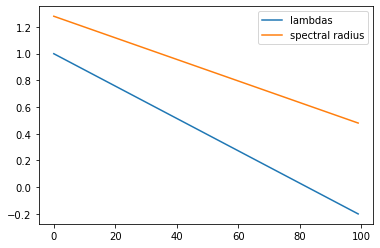

In [181]:
plt.figure()
plt.plot(lambdas, label ='lambdas')
plt.plot(spec_radiuss,label = 'spectral radius')
plt.legend()
plt.show()

In [ ]:
#if we do the same experiment, holding the spectral radius of a graph constant while increasing the 
#variance of the degree distribution, will this result in a change in the output variance?
# kinda interesting linear systems question. 



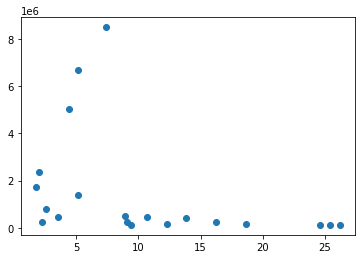

AssertionError: 

In [221]:
import seaborn as sns

num_nodes = 50
rho = .1
v = .5
d= 5
A = np.zeros((num_nodes,num_nodes))

dist = np.exp(-.1*np.arange(20))
dist /=np.sum(dist)

# generate_graph

for i in range(num_nodes):
    num_edges = np.random.choice(len(dist), p = dist)
    pot_edges = list(np.arange(num_nodes))
    pot_edges.remove(i)
    edges = np.random.choice(pot_edges,num_edges)
    for j in edges:
        A[i,j] =1
        
def calculate_rho(Adj_mat,v,d,desired_spec_rad = .95):
    
    diags = (1-v-(1/d)+(v/d))*np.eye(Adj_mat.shape[0])
    w,v = np.linalg.eig(Adj_mat)
    
    max_val = max(list(np.abs(w)))
    
    #we want .95 = diags[0] + rho*max_val.
    try:
        rho = (.95-diags[0,0])/max_val
    except:
        rho=.1
    
    return rho

rho = calculate_rho(A,v,d)
# A *= rho
# A += (1-v-(1/d)+(v/d))*np.eye(num_nodes)

from statistics import variance as var
    

def calculate_H2_pos(Adj_mat,v,d, num_its=1000, run_sys = 100):
    
    norms = []
    rho = calculate_rho(Adj_mat,v,d)
    A = Adj_mat
    A *= rho
    A += (1-v-(1/d)+(v/d))*np.eye(num_nodes)
    
    
    
    for i in range(num_its):
        w = np.random.normal(0,1,len(Adj_mat))
        
        traj_norm = 0
        
        state = np.copy(w)**2
        
        traj_norm = state.dot(state)
        
        for i in range(run_sys):
            
            state = A.dot(state)
            traj_norm += state.dot(state)
            
        norms.append(traj_norm)
    
#     plt.figure()
#     sns.kdeplot(norms, shade=True, bw=40, color="blue")

#     plt.show()
    
    return norms, sum(norms)/len(norms), var(norms)



exp_vals = np.flip(-np.linspace(0,.6,20))
variances = []
norm_vars = []
for val in exp_vals:
    dist = np.exp(val*np.arange(20))
    dist /=np.sum(dist)

    # generate_graph
    A = np.zeros((num_nodes,num_nodes))
    for i in range(num_nodes):
        num_edges = np.random.choice(len(dist), p = dist)
        pot_edges = list(np.arange(num_nodes))
        pot_edges.remove(i)
        edges = np.random.choice(pot_edges,num_edges)
        for j in edges:
            A[i,j] =1
        
    variances.append(var(np.sum(A, axis = 1)))
    
    n,mu,va = calculate_H2_pos(A,v,d)
    
    norm_vars.append(va)
    
    
    
plt.figure()
plt.scatter(variances,norm_vars)
plt.show()

assert False
    
    
    

    
calculate_H2_pos(A,v,d)
            
            
dist = np.exp(-.5*np.arange(20))
dist /=np.sum(dist)

# generate_graph

for i in range(num_nodes):
    num_edges = np.random.choice(len(dist), p = dist)
    pot_edges = list(np.arange(num_nodes))
    pot_edges.remove(i)
    edges = np.random.choice(pot_edges,num_edges)
    for j in edges:
        A[i,j] =1

calculate_H2_pos(A,v,d)
    

# w,v = np.linalg.eig(A)
# print(w)
# print(v)

assert False







for i in range(num_nodes-1):
    for j in range(i+1,num_nodes):
        if np.random.rand() <.5:
            A[i,j] = 1
            
A = A+A.T

In [2]:

num_nodes = 30
rho = 0
v = .5
d= 5
A = np.zeros((num_nodes,num_nodes))

for i in range(num_nodes-1):
    for j in range(i+1,num_nodes):
        if np.random.rand() <.5:
            A[i,j] = 1
            
A = A+A.T

sim = probability_evolution(num_nodes,rho,v,d,A)

sim.simulate(100)
sim.simulate_linear_system(100)

for i in range(1):
    plt.plot(np.array(sim.trajectory)[:,i])
    plt.plot(np.array(sim.linear_trajectory)[:,i])
    plt.show()





NameError: name 'probability_evolution' is not defined

In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




class epidemic_node2:
    def __init__(self, cure_rate, delay):
        self.susceptible = True
        self.infected = False
        self.tested = False
        self.test_date = 0
        self.connections = []
        self.cure_rate = cure_rate
        self.delay = delay
        
    def infect(self):
        self.susceptible = False
        self.infected = True
    
    def recover(self):
        self.infected = False
    
    def test(self):
        if self.infected:
            self.test_date = 1
    
    def update_day(self):
        if self.infected and np.random.rand() < self.cure_rate:
            self.recover()
        else:
            self.test_date+=1
        
        if self.infected and self.test_date >self.delay:
            self.tested = True
            self.recover()
    

    
    
class individual_based_model2:
    
    def __init__(self, num_nodes,rho,dist,d,v,c,delay = 0):
        
        self.rho = rho
        self.num_nodes = num_nodes
        self.d = d
        self.cure_rate = float(1)/d
        self.v = v
        self.c = c
        self.delay = delay
        
        #create connections
        self.node_dict = {i:epidemic_node2(self.cure_rate,self.delay) for i in range(self.num_nodes)}
        
        for i in range(self.num_nodes):
            num_edges = np.random.choice(len(dist),p = dist)
            pot_edges = list(np.arange(self.num_nodes))
            pot_edges.remove(i)
            connecs = np.random.choice(pot_edges,num_edges,replace= False).tolist()
            self.node_dict[i].connections = connecs    

        
    def simulate(self, num_infected_init,num_timesteps):
        
        #infect init population
        
        infected_init = np.random.choice(self.num_nodes,num_infected_init)
        
        for i in infected_init:
            self.node_dict[i].infect()
        
        infections = []
        
        for i in range(num_timesteps):
            for j in range(self.num_nodes):
                if self.node_dict[j].infected:
                    for k in self.node_dict[j].connections:
                        if self.node_dict[k].susceptible:
                            if np.random.rand() < self.rho:
                                self.node_dict[k].infect()
                    
                    
                    if self.node_dict[j].test_date ==0:
                        if np.random.rand() < self.v:
                            if self.delay ==0:
                                self.node_dict[j].recover()
                            else:
                                self.node_dict[j].test_date +=1
                                
                                
                            for k in self.node_dict[j].connections:
                                if np.random.rand() < self.c:
                                    if self.node_dict[k].infected:
                                        self.node_dict[k].test()
                    else:
                        self.node_dict[j].test_date +=1
                        if self.node_dict[j].test_date > self.delay:
                            self.node_dict[j].recover()

                    if np.random.rand() <self.cure_rate:
                        self.node_dict[j].recover()
                        
                    
            
                
                
        
            num_infected = 0
            for j in range(self.num_nodes):
                if self.node_dict[j].infected:
                    num_infected +=1
    
            infections.append(num_infected)
        
        total_num_infected = 0
        for j in range(self.num_nodes):
            if not self.node_dict[j].susceptible:
                total_num_infected +=1
                
            
#         plt.figure()
#         plt.plot(infections)
#         plt.show()
        
        return infections,total_num_infected
    
    #okay so if this works, we just need a monte carlo simulator and create a heatmap using sns
    #varying the level of testing and the degree of delays
    


In [75]:
from tqdm import tqdm

num_nodes = 500
rho = .05
dist = np.exp(-.3*np.arange(10))
dist /=np.sum(dist)
d = 5
v = 1
c= 0
delay = 0


sim = individual_based_model2(num_nodes,rho,dist,d,v,c,delay) 
x,y = sim.simulate(10,100)
print(y)




def monte_carlo_simulator(sim,num_infected_init,num_timesteps,num_trials):
    
    avg_num_infected = 0
    
    for i in range(num_trials):
        x,y = sim.simulate(num_infected_init,num_timesteps)
        
        avg_num_infected +=y
    
    return (avg_num_infected/num_trials)/sim.num_nodes

delays = np.arange(10)

testing_levels = np.linspace(0,1,20)

output_mat = np.zeros((10,20))

num_trials = 100
num_timesteps = 100
num_infected_init = 3

for i in tqdm(range(len(delays))):
    for j in range(len(testing_levels)):
        delay = delays[i]
        v = testing_levels[j]
        sim = individual_based_model2(num_nodes,rho,dist,d,v,c,delay)
        
        percent_infected = monte_carlo_simulator(sim,num_infected_init,num_timesteps,num_trials)
        
        output_mat[i,j] = percent_infected


        

        




  0%|          | 0/10 [00:00<?, ?it/s]

13


100%|██████████| 10/10 [08:56<00:00, 53.69s/it]


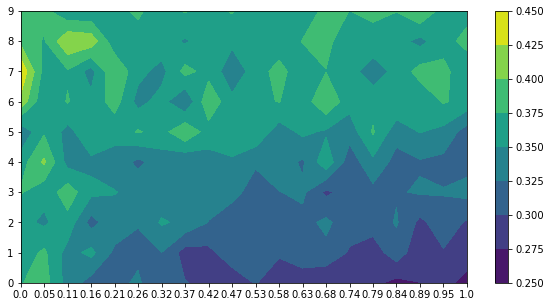

In [76]:
plt.figure(figsize=(10,5))

rounded_testing = [round(testing_levels[i],2) for i in range(20)]
plt.contourf(output_mat)
plt.colorbar()
plt.yticks(delays)
plt.xticks(np.arange(20),rounded_testing)
plt.show()

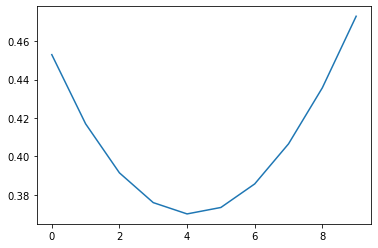

In [86]:
def lambda_with_delay(rho,mu_x,delay,d,v):
    
    cure_val = (1 - ((1-(1/d))**delay))
    
    #maybe we adjust rho too
    
    l = 1 + (1-((1-rho)**delay))*delay*mu_x - v -(1-v)*cure_val
    
    return l

rho = .001
mu_x = 3
delays = np.arange(1,11)
d = 10
v = .5
lambdas = []
for i in range(10):
    delay = delays[i]
    lambdas.append(lambda_with_delay(rho,mu_x,delay,d,v))

plt.plot(lambdas)

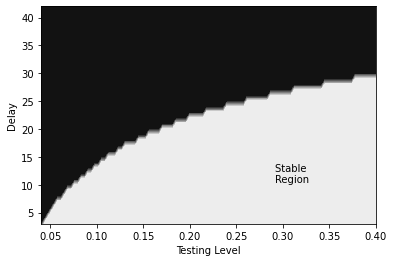

AssertionError: 

In [218]:
#let's see if this fixes the problem

def delay_system_matrix(rho,mu_x,delay,v,d):
    
    #this is actually for a system with delay +1 but it's fine
    
    delay_mat = np.zeros((int(delay),int(delay)))
    l = 1+rho*mu_x-(float(1)/d)
    alpha = -((1-(float(1)/d))**delay)*v
    delay_mat[0,0] = l
    delay_mat[0,-1] = alpha
    for i in range(1,int(delay)):
        delay_mat[i,i-1] = 1
    
    return delay_mat

rho =.03
mu_x = 3.3
delay = 4
v = .08
d = 15
# x = np.zeros(delay)
# for i in range(delay):
#     x[delay-1-i] = (1+rho*mu_x-(float(1)/d))**i

# traj = [x]
# mat = delay_system_matrix(rho,mu_x,delay,v,d)

# for i in range(400):
#     newx = np.copy(mat.dot(x))
#     for j in range(len(newx)):
#         if newx[j] <=0:
#             newx[j] =0
#     traj.append(np.copy(newx))
#     x = np.copy(newx)
# traj = np.array(traj)
# plt.figure()
# plt.plot(traj[:,0])
# plt.show()
# assert False




def traj_func(delay,v):
    x = np.zeros(delay)
    for i in range(delay):
        x[delay-1-i] = (1+rho*mu_x-(float(1)/d))**i


#     print(x)
    traj = [x]
    mat = delay_system_matrix(rho,mu_x,delay,v,d)

    for i in range(50):
        newx = np.copy(mat.dot(x))
        for j in range(len(newx)):
            if newx[j] <=0:
                newx[j] =0
        traj.append(np.copy(newx))
        x = np.copy(newx)
    traj = np.array(traj)
    
    traj = np.array(traj)
    traj1 = traj[:,0]
    
    
    
    return traj1[-1]
    
#     if traj1[-1] < .1*traj1[0]:
#         return 1
#     else:
#         return 0
    


convergences = np.zeros((40,100))
testing_levels = np.linspace(.04,.4,100)
delays = np.arange(3,43)


test_line = []


for i in range(40):
    for j in range(100):
        val = traj_func(delays[i],testing_levels[j])
#         if val >1:
#             test_line.append(testing_levels[j])
#             break
        if val >1:
            convergences[i,j] =0
        else:
            convergences[i,j] = 1

plt.figure()
plt.contourf(testing_levels,delays,convergences,cmap = 'gray')
plt.xlabel('Testing Level')
plt.ylabel('Delay')
# plt.text(0.3, 0.75, 'Convergent \nRegion',  fontsize=10)
# plt.colorbar()


plt.annotate('Stable \nRegion', xy=(0.7, 0.19), xycoords='axes fraction')
plt.savefig('DelaySimulation.pdf')
plt.show()




assert False
testing_levels = np.linspace(.04,.4,100)


assert False




delays = np.arange(2,20)

spec_norms = []

for i in range(len(delays)):
    delay = delays[i]
    mat = delay_system_matrix(rho,mu_x,delay,v,d)
    
    u,w = np.linalg.eig(mat)
#     print(v1)


    
    
    spec_norms.append(np.max(np.abs(u)))
    
plt.figure()
plt.plot(delays,spec_norms)
plt.show()

#well what do the trajectories of the two systems look like then?

#I think I see what's happening. the t-kth term is big enough 
    

In [235]:
def VarS_n_system(rho,
                  d,
                  v,
                  mu_x,
                  sigma_x,
                  timesteps = 1000,
                  x_1 = 10,
                  x_2 = 0,
                  x_3 = 0):
    
    lambdaVal = 1 + rho*mu_x - v- ((1-v)/d)
    
    print(lambdaVal)
    
    
    
    gammaVal = mu_x*rho*(1-rho) + (rho**2)*(sigma_x**2) + (1- v- ((1-v)/d))*(v+((1-v)/d))
    
    x_2 = gammaVal*x_1
    
    x_3 = (1+(1/lambdaVal))*x_1
    
    x_4 = (1/lambdaVal)*x_1
    
    x_5 = np.copy(x_2)
    
    x_6 = 0
    
    x_7 = 0
    
    
    
    vals = []
    vals.append([x_1,x_2,x_3,x_4,x_5,x_6,x_7])
    
    for i in range(timesteps):
        c_2 = (lambdaVal**2)*(1-((1/lambdaVal)**(i+3)))/(1-(1/lambdaVal))
        c_1 = lambdaVal*(1-((1/lambdaVal)**(i+1)))/(1-(1/lambdaVal))
        
        x_1_new = lambdaVal*np.copy(x_1)
        x_2_new = gammaVal*np.copy(x_1)+(lambdaVal**2)*np.copy(x_2)
        x_3_new = ((1-((lambdaVal)**(i+3)))/((1-((lambdaVal)**(i+2)))))*np.copy(x_3)
        x_4_new = x_3
        x_5_new = gammaVal*x_1+c_2*x_2+x_6+(x_4**2)+((c_1**2)*x_2)+((c_1*x_1)**2) - 2*c_1*(x_4*x_1+ x_7)
        x_6_new = x_5
        x_7_new = lambdaVal*(x_2+x_7)
        
        x_1= x_1_new
        x_2 = x_2_new
        x_3 = x_3_new
        x_4 = x_4_new
        x_5 = x_5_new
        x_6 = x_6_new
        x_7 = x_7_new
        
        vals.append([x_1,x_2,x_3,x_4,x_5,x_6,x_7])
    
    vals = np.array(vals)
    
    plt.figure()
    plt.plot(vals[:,4])
    plt.show()
    
    return vals[-1,4]

        
        
        
    

0.93


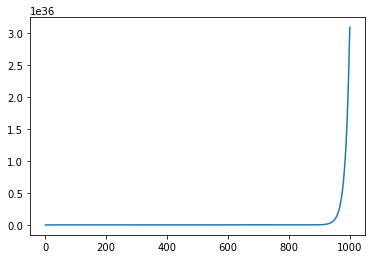

In [236]:
rho = .1
mu_x = 3
v = .3
d = 10
sigma_x= 0


val = VarS_n_system(rho,
                  d,
                  v,
                  mu_x,
                  sigma_x,
                  timesteps = 1000,
                  x_1 = 10,
                  x_2 = 0,
                  x_3 = 0)

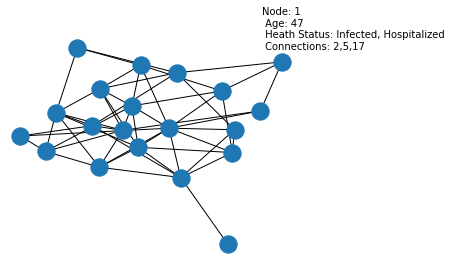

In [253]:
import networkx as nx
from networkx.generators.random_graphs import fast_gnp_random_graph

G = fast_gnp_random_graph(20,.3)


text = "Node: 1 \n Age: 47 \n Heath Status: Infected, Hospitalized \n Connections: 2,5,17"
plt.figure(figsize = (4,3))
plt.tight_layout()
nx.draw(G)
plt.annotate(text,xy = (.5,.6))
plt.savefig('IBMNetwork.png', bbox_inches = "tight")
plt.show()




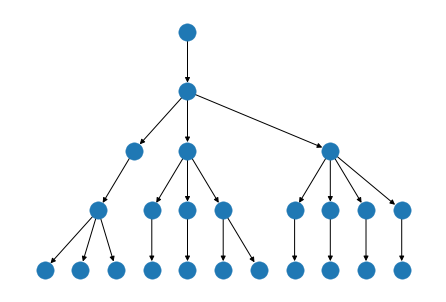

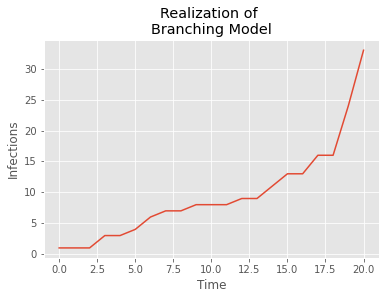

In [270]:
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

G = nx.DiGraph()
plt.style.use('ggplot')
# G.add_node("ROOT")

# for i in range(5):
#     G.add_node("Child_%i" % i)
#     G.add_node("Grandchild_%i" % i)
#     G.add_node("Greatgrandchild_%i" % i)

#     G.add_edge("ROOT", "Child_%i" % i)
#     G.add_edge("Child_%i" % i, "Grandchild_%i" % i)
#     G.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i)

# write dot file to use with graphviz
# run "dot -Tpng test.dot >test.png"







degree_dist = np.exp(-.6*np.arange(10))
degree_dist[0] = degree_dist[-1]
degree_dist /= np.sum(degree_dist)



# G = nx.Graph()
node_ind = 1


layer_inds = [0]
for j in range(4):
    new_layer_inds = []
    for i in layer_inds:
        #sample from degree dist
        deg_samp = np.random.choice(10,p = degree_dist)
        for ii in range(deg_samp):
            G.add_edge(i,node_ind)
            new_layer_inds.append(node_ind)
            node_ind+=1
        
    layer_inds = new_layer_inds
    
write_dot(G,'test.dot')

# same layout using matplotlib with no labels
# plt.title('draw_networkx')
pos =graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=False, arrows=True)
plt.savefig('infection_tree.png', bbox_inches = "tight")
plt.show()

v = .2
rho = .2
d = 15

branching_trajectory = [1]

for i in range(20):
    new_infecs = 0
    for j in range(branching_trajectory[-1]):
        deg_samp = np.random.choice(10,p = degree_dist)
        for k in range(deg_samp):
            if np.random.rand() < rho:
                new_infecs +=1
        if np.random.rand() < v:
            new_infecs -=1
        elif np.random.rand() < 1/d:
            new_infecs-=1
    new_infecs = max([0,new_infecs])
    branching_trajectory.append(branching_trajectory[-1]+new_infecs)
    
plt.figure()
plt.title('Realization of \nBranching Model')
plt.plot(branching_trajectory)
plt.xlabel('Time')
plt.ylabel('Infections')
plt.savefig('BranchingModelRealization.png', bbox_inches = "tight")
plt.show()
        
    
  
        